# Import data from DB.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfOrg = pd.read_csv('hope_dataset_cleaned.csv')  

print(dfOrg.shape[0])

1243


In [3]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,FISTULA PERITONEAL,male,27395425,2018,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",1.0
1,75.0,FISTULA PERITONEAL,male,28560554,2018,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
2,75.0,FISTULA PERITONEAL,male,28641726,2017,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
3,75.0,FISTULA PERITONEAL,male,26245344,2016,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
4,75.0,FISTULA PERITONEAL,male,28942543,2018,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
5,75.0,FISTULA PERITONEAL,male,24782153,2014,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
6,75.0,FISTULA PERITONEAL,male,28002229,2018,9,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
7,75.0,FISTULA PERITONEAL,male,27505109,2017,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
8,75.0,FISTULA PERITONEAL,male,24850546,2015,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
9,75.0,FISTULA PERITONEAL,male,29371050,2019,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN


# Transform (factorice) from Categories to continuous atributes

Transform 'pedido.data.attributes.diagnostic_main' atribute

In [4]:
dataDiagnosticMain, categoriesDiagnosticMain = pd.factorize(dfOrg['pedido.data.attributes.diagnostic_main'])

dfOrg['pedido.data.attributes.diagnostic_main'] = dataDiagnosticMain

Transform 'gender' atribute

In [5]:
dataGender, categoriesGender = pd.factorize(dfOrg['pedido.data.attributes.gender'])

dfOrg['pedido.data.attributes.gender'] = dataGender

Transform 'respuesta.pubmed_keys' atribute

In [6]:
categoriesORGPubMedKeys = dfOrg['respuesta.pubmed_keys'].value_counts()

print("total: " + str(categoriesORGPubMedKeys.size))

total: 80


In [7]:
dataPubMedKeys, categoriesPubMedKeys = pd.factorize(dfOrg['respuesta.pubmed_keys'])

dfOrg['respuesta.pubmed_keys'] = dataPubMedKeys

In [8]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,0,0,27395425,2018,1,0,1.0
1,75.0,0,0,28560554,2018,4,0,NaN
2,75.0,0,0,28641726,2017,12,0,NaN
3,75.0,0,0,26245344,2016,12,0,NaN
4,75.0,0,0,28942543,2018,6,0,NaN
5,75.0,0,0,24782153,2014,6,0,NaN
6,75.0,0,0,28002229,2018,9,0,NaN
7,75.0,0,0,27505109,2017,4,0,NaN
8,75.0,0,0,24850546,2015,1,0,NaN
9,75.0,0,0,29371050,2019,4,0,NaN


In [9]:
print("age NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.age'])].shape[0]))
print("diagnostic_main NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.diagnostic_main'])].shape[0]))
print("gender NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.gender'])].shape[0]))
print("articulo NaN => " + str(dfOrg[pd.isnull(dfOrg['articulo'])].shape[0]))
print("articlesRevisedYear NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.articlesRevisedYear'])].shape[0]))
print("articlesRevisedMonth NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.articlesRevisedMonth'])].shape[0]))
print("pubmed_keys NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.pubmed_keys'])].shape[0]))
print("utilidad NaN => " + str(dfOrg[pd.isnull(dfOrg['utilidad'])].shape[0]))

age NaN => 10
diagnostic_main NaN => 0
gender NaN => 0
articulo NaN => 0
articlesRevisedYear NaN => 0
articlesRevisedMonth NaN => 0
pubmed_keys NaN => 0
utilidad NaN => 1192


Remove row with age eq NaN

In [10]:
dfOrg = dfOrg[pd.notnull(dfOrg['pedido.data.attributes.age'])]

# Standardize the Data

Choosed "age", "diagnostic_main", "year", "pubmed_keys" and "articulo" attributes (based on PCA_V2 study)

In [11]:
from sklearn.preprocessing import StandardScaler

features = ["pedido.data.attributes.age",
    "pedido.data.attributes.diagnostic_main",
    "respuesta.articlesRevisedYear",
    "respuesta.pubmed_keys",
    "articulo"]

# Separating out the features
x = dfOrg.loc[:, features].values

featuresTransformed = StandardScaler().fit_transform(x)

dfStandarized = pd.DataFrame(featuresTransformed, index=dfOrg.index, columns=features)
dfStandarized['utilidad'] = dfOrg['utilidad']

dfStandarized

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.pubmed_keys,articulo,utilidad
0,1.443474,-1.360638,0.643671,-1.650220,-0.221939,1.0
1,1.443474,-1.360638,0.643671,-1.650220,0.137839,NaN
2,1.443474,-1.360638,0.224418,-1.650220,0.162904,NaN
3,1.443474,-1.360638,-0.194835,-1.650220,-0.577070,NaN
4,1.443474,-1.360638,0.643671,-1.650220,0.255793,NaN
...,...,...,...,...,...,...
1238,-0.429381,-0.580827,-0.194835,1.520816,0.574852,NaN
1239,-0.429381,-0.580827,1.062924,1.520816,-0.540973,NaN
1240,-0.429381,-0.580827,-0.614089,1.520816,0.801912,NaN
1241,-0.429381,-0.580827,1.062924,1.520816,-0.056202,NaN


# Separe data by utilidad is defined

In [12]:
dfDataSetComplete = dfStandarized[pd.notnull(dfStandarized['utilidad'])]

print(dfDataSetComplete.shape[0])

dfDataSetToPredict = dfStandarized[pd.isnull(dfStandarized['utilidad'])]

print(dfDataSetToPredict.shape[0])

51
1182


# Random Forest

We check the number of results

In [13]:
 dfDataSetComplete.groupby('utilidad').size()

utilidad
0.0    21
1.0    30
dtype: int64

Separe "utilidad" atribute from dataToTrain

In [14]:
X = np.array(dfDataSetComplete.drop(['utilidad'],1))
y = np.array(dfDataSetComplete['utilidad'])
X.shape

(51, 5)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Exploring number of estimators

Via the sample size n of the bootstrap sample, we control the bias-variance tradeoff of the random forest. By choosing a larger value for n, we decrease the randomness and thus the forest is more likely to overfit. On the other hand, we can reduce the degree of overfitting by choosing smaller values for n at the expense of the model performance. In most implementations, including the RandomForestClassifier implementation in scikit-learn, the sample size of the bootstrap sample is chosen to be equal to the number of samples in the original training set, which usually provides a good bias-variance tradeoff.

https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

k_range = range(5, 205, 5)
accuracy = []

for k in k_range:
    forest_test = RandomForestClassifier(
        criterion='entropy',
        n_estimators=k, 
        random_state=0
    )
    forest_test.fit(X_train, y_train)
    y_pred_test = forest_test.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, y_pred_test))

Text(0, 0.5, 'Accuracy')

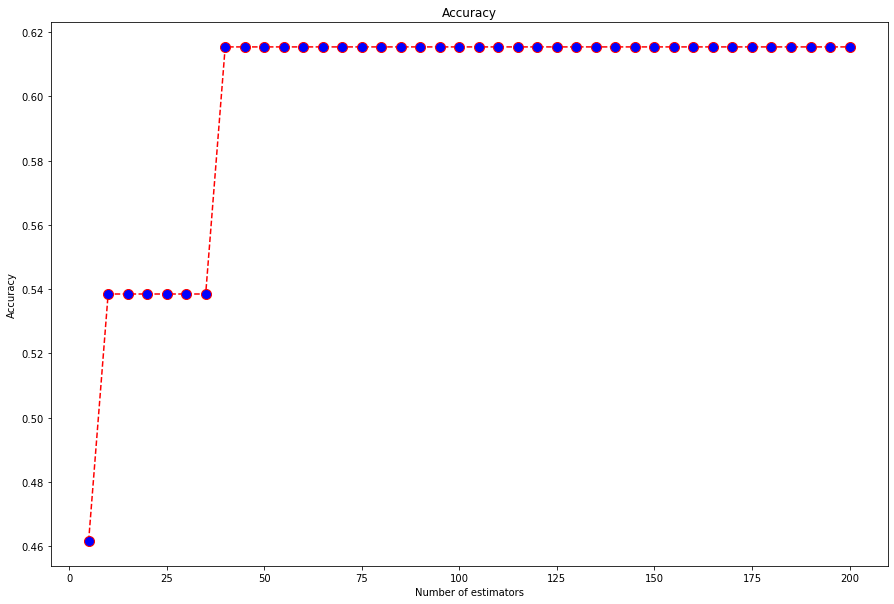

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(15, 10))
axs.plot(k_range, accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs.set_title('Accuracy')
axs.set_xlabel('Number of estimators')
axs.set_ylabel('Accuracy')


## Evaluating the Algorithm

In [18]:
forest = RandomForestClassifier(
    criterion='entropy',
    n_estimators=40,
    random_state=0
)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.67      0.62         6
         1.0       0.67      0.57      0.62         7

    accuracy                           0.62        13
   macro avg       0.62      0.62      0.62        13
weighted avg       0.62      0.62      0.62        13

0.6153846153846154


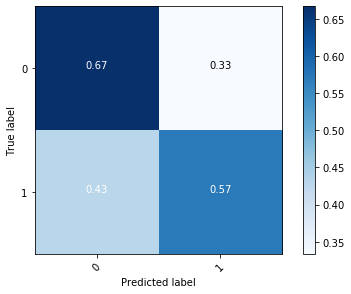

In [19]:
import itertools


cnf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    cmap=plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], ".2f"),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

n_classes=["0","1"]
plot_confusion_matrix(cnf_matrix, classes=n_classes)

# Run Prediction

In [20]:
result = forest.predict(dfDataSetToPredict[[
    "pedido.data.attributes.age",
    "pedido.data.attributes.diagnostic_main",
    "respuesta.articlesRevisedYear",
    "respuesta.pubmed_keys",
    "articulo"
]])

result

array([1., 1., 1., ..., 1., 0., 0.])

https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
https://bookdown.org/content/2031/ensambladores-random-forest-parte-i.html
https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
